In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = r"D:\Work\Ahsan\Energy star\ENERGY_STAR_Certified_Uninterruptible_Power_Supplies_20241201.csv"
df = pd.read_csv(file_path)

In [16]:
df.shape

(801, 95)

In [20]:
for i in df.columns:
    print(i)

ENERGY STAR Partner
Brand Name
Model Name
Model Number
Additional Model Information
UPC
Product Type
Power Conversion Mechanism
Minimum Configuration Tested Model Number
Active Output Power Rating Minimum Configuration (W)
Apparent Output Power Rating Minimum Configuration (VA)
Maximum Configuration Tested Model Number
Active Output Power Rating Maximum Configuration (W)
Apparent Output Power Rating Maximum Configuration (VA)
Topology (ac)
Topology and Product Type Combined
Application
Rated Input Voltage (V rms)
Rated Input Frequency (Hz)
Rated Output Voltage (V)
Rated Output Frequency (Hz)
Rack Mountable
Rack Mount Height (U)
Height (mm)
Width (mm)
Depth (mm)
Total Number of Outlets
Number of Battery Backup and Surge Protected Outlets
Number of Surge Protected Only Outlets
Normal Mode(s) Input Dependency Characteristic (ac)
Modular UPS
Number of Normal Modes
Default Normal Mode (ac)
Test Input Voltage (V rms)
Test Input Frequency (Hz)
Test Output Voltage (V)
Test Output Frequency (Hz

In [8]:
# 1. Drop columns identified as not useful for EDA
columns_to_remove = [
    "ENERGY STAR Unique ID", "CB Model Identifier", "Model Web Page URL",
    "Energy Storage System Information URL", "Battery Recycling URL",
    "Manufacturer Take Back Program URL", "Test Method Guidelines"
]
df = df.drop(columns=columns_to_remove, inplace=True, errors='ignore')

In [14]:
# 2. Descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
print("Numerical Columns Summary:")
df[numerical_cols].describe().T

Numerical Columns Summary:


,count,mean,std,min,25%,50%,75%,max
Active Output Power Rating Minimum Configuration (W),801.0,21242.721598,80953.064309,60.00,900.00,1920.00,6000.0,1000000.0
Apparent Output Power Rating Minimum Configuration (VA),801.0,22332.521848,86207.462000,240.00,1000.00,2000.00,6000.0,1000000.0
Active Output Power Rating Maximum Configuration (W),99.0,112705.454545,155296.137140,660.00,15000.00,60000.00,120000.0,1000000.0
Apparent Output Power Rating Maximum Configuration (VA),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rack Mount Height (U),259.0,3.478764,4.498334,1.00,2.00,2.00,3.0,24.0
...,...,...,...,...,...,...,...,...
Maximum Configuration Input Power Factor Highest-Input Dependency,88.0,0.993864,0.008897,0.93,0.99,0.99,1.0,1.0
Efficiency (%),801.0,96.168290,2.656679,89.70,94.00,96.70,98.6,100.0
Energy Storage System Runtime at 100% Load (min.),756.0,5.539683,5.487591,1.00,3.00,4.00,6.0,51.0
Energy Storage System Runtime at 50% Load (min.),756.0,14.252646,9.883610,3.00,9.00,11.00,15.0,111.0


# 1. Efficiency Trends Across Load Configurations

- **Plot:** Line plots for efficiency at different load percentages (e.g., 25%, 50%, 75%, 100%) across configurations (minimum and maximum)

- **Benefit:** Highlights how efficiently power is consumed under different loads, aiding in identifying the optimal configurations for energy savings.

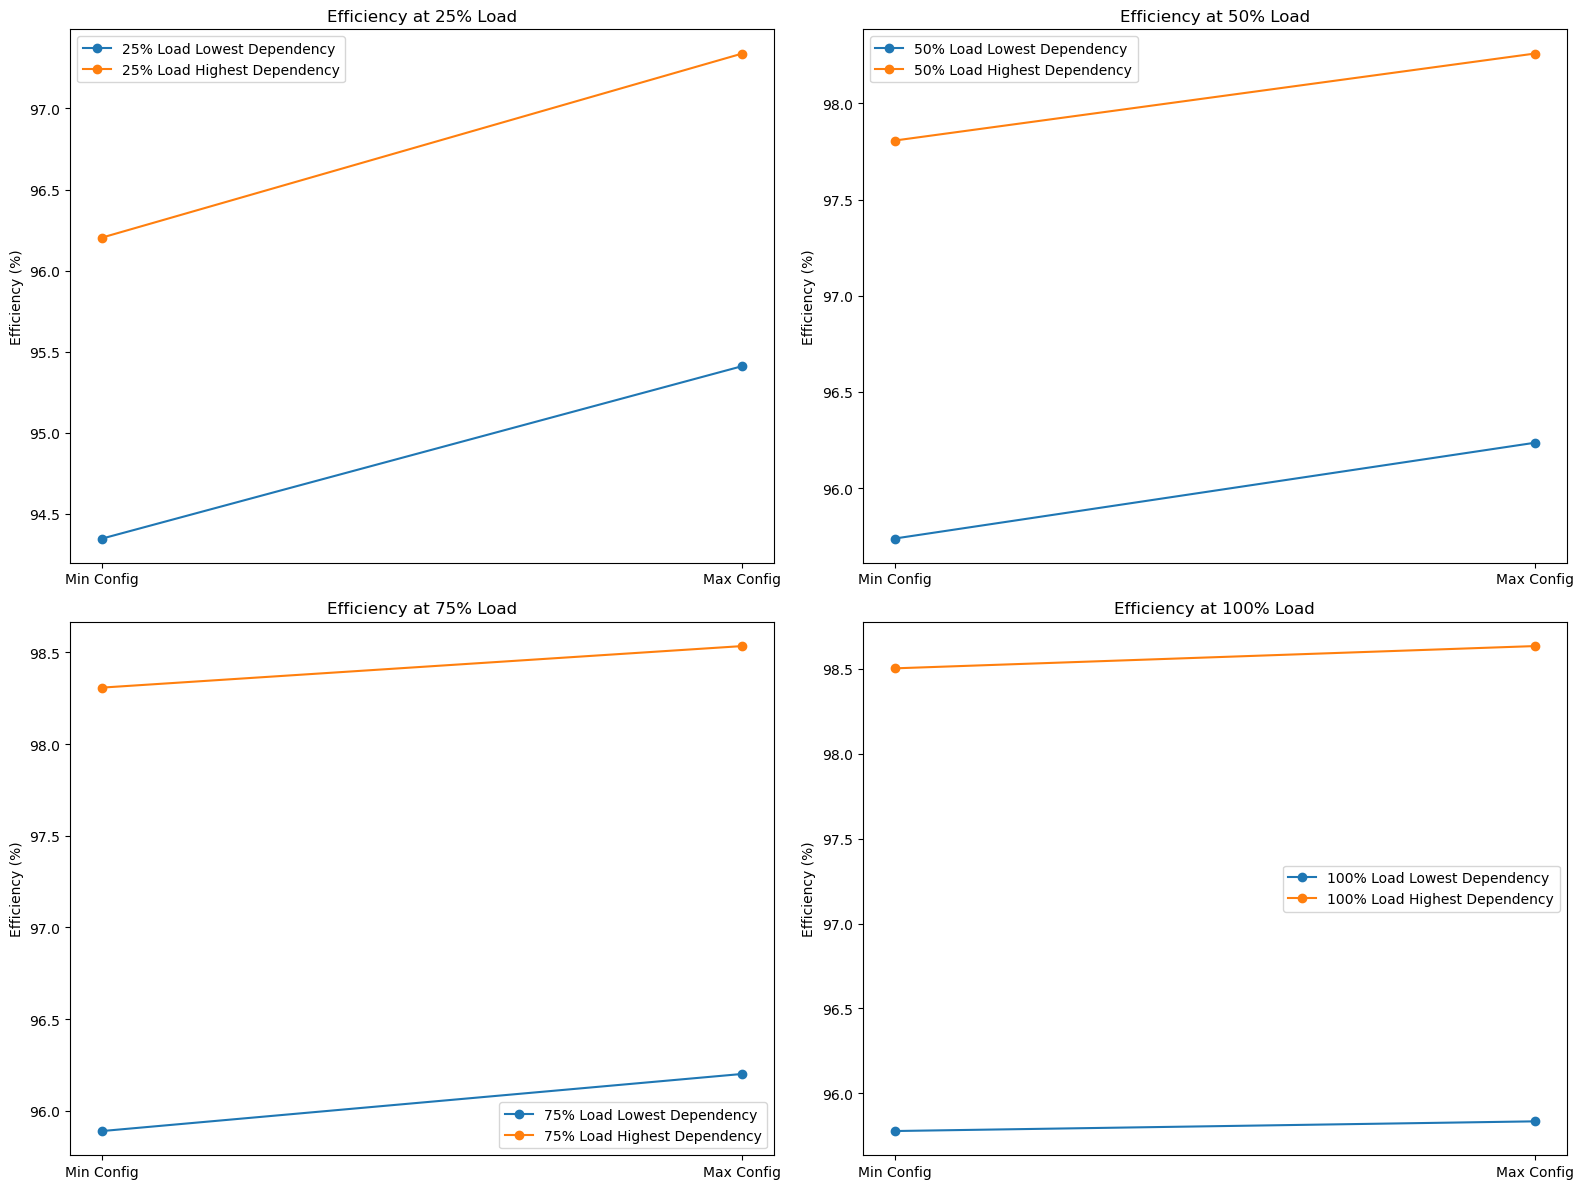

In [22]:
fig1, ax1 = plt.subplots(2, 2, figsize=(16, 12))
load_percentages = [25, 50, 75, 100]
dependencies = ["Lowest Dependency", "Highest Dependency"]

for i, percentage in enumerate(load_percentages):
    for j, dep in enumerate(dependencies):
        col_name_min = f"Efficiency at {percentage}% Load Min Config {dep} (ac)"
        col_name_max = f"Efficiency at {percentage}% Load Max Config {dep} (ac)"
        ax = ax1[i // 2, i % 2]
        if col_name_min in df.columns and col_name_max in df.columns:
            ax.plot(
                ["Min Config", "Max Config"],
                [df[col_name_min].mean(), df[col_name_max].mean()],
                marker='o',
                label=f"{percentage}% Load {dep}"
            )
            ax.set_title(f"Efficiency at {percentage}% Load")
            ax.set_ylabel("Efficiency (%)")
            ax.legend()

plt.tight_layout()

# 2. Power Consumption at Zero Load
- **Plot:** Bar chart comparing Total Input Power in W at 0% Load for both minimum and maximum configurations.
- **Columns:**
    - Total Input Power in W at 0% Load Min Config Lowest Dependency (ac)
    - Total Input Power in W at 0% Load Max Config Lowest Dependency (ac)
- **Benefit:** Reveals baseline power consumption when the UPS is idle, helping evaluate standby energy costs.

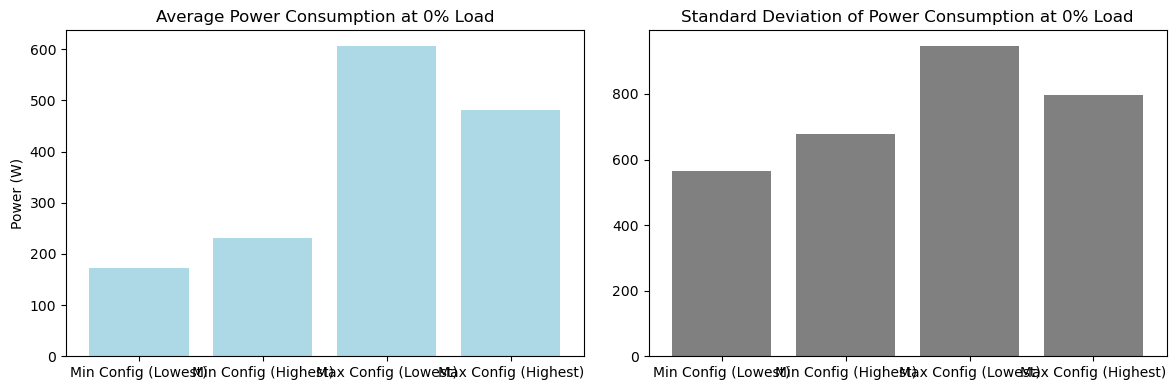

In [32]:
fig2, ax2 = plt.subplots(1, 2, figsize=(12, 4))

power_cols = [
    "Total Input Power in W at 0% Load Min Config Lowest Dependency (ac)",
    "Total Input Power in W at 0% Load Min Config Highest Dependency (ac)",
    "Total Input Power in W at 0% Load Max Config Lowest Dependency (ac)",
    "Total Input Power in W at 0% Load Max Config Highest Dependency (ac)"
]
labels = ["Min Config (Lowest)", "Min Config (Highest)", "Max Config (Lowest)", "Max Config (Highest)"]

for i, col in enumerate(power_cols):
    if col in df.columns:
        ax2[0].bar(labels[i], df[col].mean(), color = 'lightblue')
        ax2[1].bar(labels[i], df[col].std(), color='gray')

ax2[0].set_title("Average Power Consumption at 0% Load")
ax2[0].set_ylabel("Power (W)")
ax2[1].set_title("Standard Deviation of Power Consumption at 0% Load")
plt.tight_layout()

# 3. Weighted Efficiency Comparison
- **Plot:** Bar chart of Weighted Efficiency Calc Min Config vs. Weighted Efficiency Calc Max Config.
- **Columns:**
    - Weighted Efficiency Calc Min Config Lowest Dependency
    - Weighted Efficiency Calc Max Config Highest Dependency
- **Benefit:** Simplifies the comparison of overall efficiency for minimum and maximum configurations.

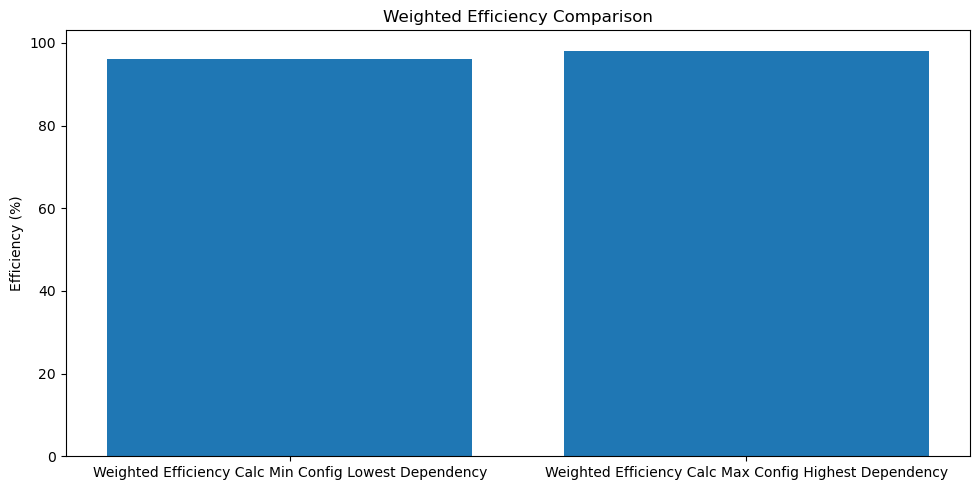

In [46]:
fig3, ax3 = plt.subplots(figsize=(10, 5))
weighted_efficiency_cols = [
    "Weighted Efficiency Calc Min Config Lowest Dependency",
    "Weighted Efficiency Calc Max Config Highest Dependency"
]

if all(col in df.columns for col in weighted_efficiency_cols):
    ax3.bar(weighted_efficiency_cols, [df[col].mean() for col in weighted_efficiency_cols])
    ax3.set_title("Weighted Efficiency Comparison")
    ax3.set_ylabel("Efficiency (%)")

plt.tight_layout()

# 4. Output Power Ratings
- **Plot:** Scatter plot of Active Output Power Rating vs. Apparent Output Power Rating for both minimum and maximum configurations.
- **Columns:**
    - Active Output Power Rating Minimum Configuration (W)
    - Apparent Output Power Rating Minimum Configuration (VA)
    - Active Output Power Rating Maximum Configuration (W)
    - Apparent Output Power Rating Maximum Configuration (VA)
- **Benefit:** Examines the relationship between active and apparent power, offering insights into real vs. reactive power.

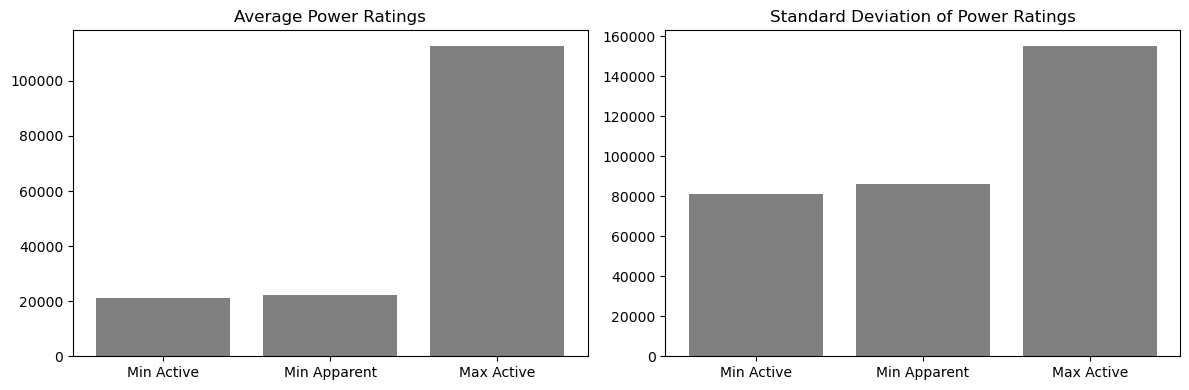

In [52]:
fig4, ax4 = plt.subplots(1, 2, figsize=(12, 4))
power_rating_cols = [
    "Active Output Power Rating Minimum Configuration (W)",
    "Apparent Output Power Rating Minimum Configuration (VA)",
    "Active Output Power Rating Maximum Configuration (W)",
    "Apparent Output Power Rating Maximum Configuration (VA)"
]
labels = ["Min Active", "Min Apparent", "Max Active", "Max Apparent"]

for i, col in enumerate(power_rating_cols):
    if col in df.columns:
        ax4[0].bar(labels[i], df[col].mean(), label=labels[i], color = 'gray')
        ax4[1].bar(labels[i], df[col].std(), label=labels[i], color='gray')

ax4[0].set_title("Average Power Ratings")
ax4[1].set_title("Standard Deviation of Power Ratings")
plt.tight_layout()

# 5. Energy Storage System Runtime
- **Plot:** Histogram of Energy Storage System Runtime at 50% Load and Energy Storage System Runtime at 100% Load.
- **Benefit:** Shows the distribution of runtimes, helping identify products with longer durations at specific loads.

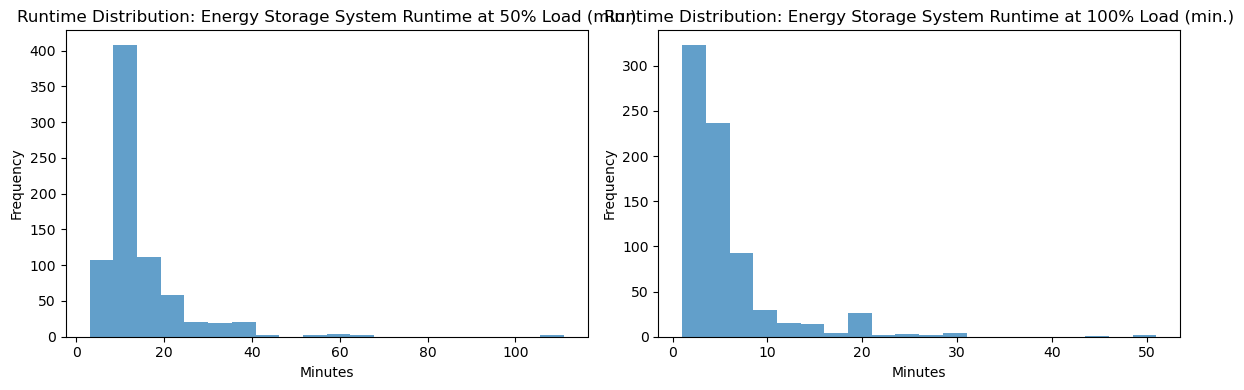

In [56]:
fig5, ax5 = plt.subplots(1, 2, figsize=(12, 4))
runtime_cols = [
    "Energy Storage System Runtime at 50% Load (min.)",
    "Energy Storage System Runtime at 100% Load (min.)"
]

for i, col in enumerate(runtime_cols):
    if col in df.columns:
        ax5[i].hist(df[col].dropna(), bins=20, alpha=0.7)
        ax5[i].set_title(f"Runtime Distribution: {col}")
        ax5[i].set_xlabel("Minutes")
        ax5[i].set_ylabel("Frequency")

plt.tight_layout()

# 6. Dimensions Analysis
- **Plot:** 3D scatter plot of Height (mm), Width (mm), and Depth (mm) to visualize size variations.
- **Benefit:** Helps identify compact or large units, crucial for rack-mounted systems.

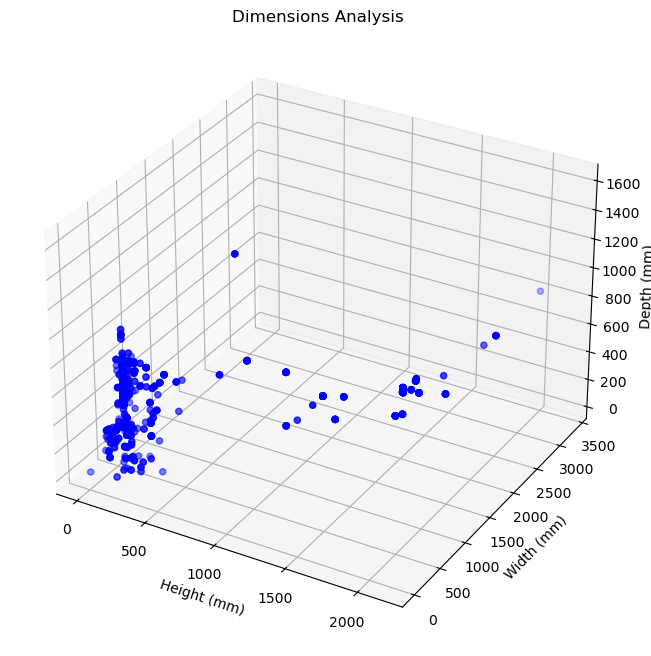

In [58]:
fig6 = plt.figure(figsize=(10, 8))
if all(col in df.columns for col in ["Height (mm)", "Width (mm)", "Depth (mm)"]):
    ax6 = fig6.add_subplot(111, projection='3d')
    ax6.scatter(df["Height (mm)"], df["Width (mm)"], df["Depth (mm)"], c='blue', marker='o')
    ax6.set_title("Dimensions Analysis")
    ax6.set_xlabel("Height (mm)")
    ax6.set_ylabel("Width (mm)")
    ax6.set_zlabel("Depth (mm)")

plt.show()

# How This Benefits Us

**Energy Efficiency Optimization:** Identifying UPS systems with the highest efficiencies under varying loads reduces operational costs and aligns with energy-saving goals.

**Product Selection:** Understanding runtime, power ratings, and dimensions assists in choosing the most suitable UPS for different applications.

**Sustainability:** Evaluating energy storage mechanisms and input power consumption helps identify environmentally friendly models.

**Design and Customization Insights:** Understanding rack-mountable dimensions and modularity enables better infrastructure planning.

**Market Competitiveness:** Insights into certified dates, markets, and warranty provide context for comparing offerings in the market.

In [5]:
# 3. Unique value counts for categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nCategorical Columns Summary:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Categorical Columns Summary:

ENERGY STAR Partner:
ENERGY STAR Partner
Schneider Electric                                 222
Vertiv Corporation                                 214
Eaton Corporation                                  148
Cyber Power Systems, Inc.                          118
Delta Electronics, Inc. Tainan Branch               26
ADI                                                 24
Para Systems, Inc./Minuteman Power Technologies     24
Panduit Corp.                                        7
Legrand AV Inc.                                      6
Appleton Grp LLC d/b/a Appleton Group                4
Ingram Micro Inc.                                    3
Mitsubishi Electric Power Products, Inc.             2
Right Power Technology Sdn Bhd                       1
Fuji Electric Corp. of America                       1
UPSONIC POWER SYSTEMS AMERICA INC                    1
Name: count, dtype: int64

Brand Name:
Brand Name
APC by Schneider Electric                     162
Ver

In [11]:
# Filter out non-numeric or NaN-containing columns from numerical_cols
valid_numerical_cols = [
    col for col in numerical_cols if np.issubdtype(df[col].dtype, np.number) and df[col].notna().all()
]

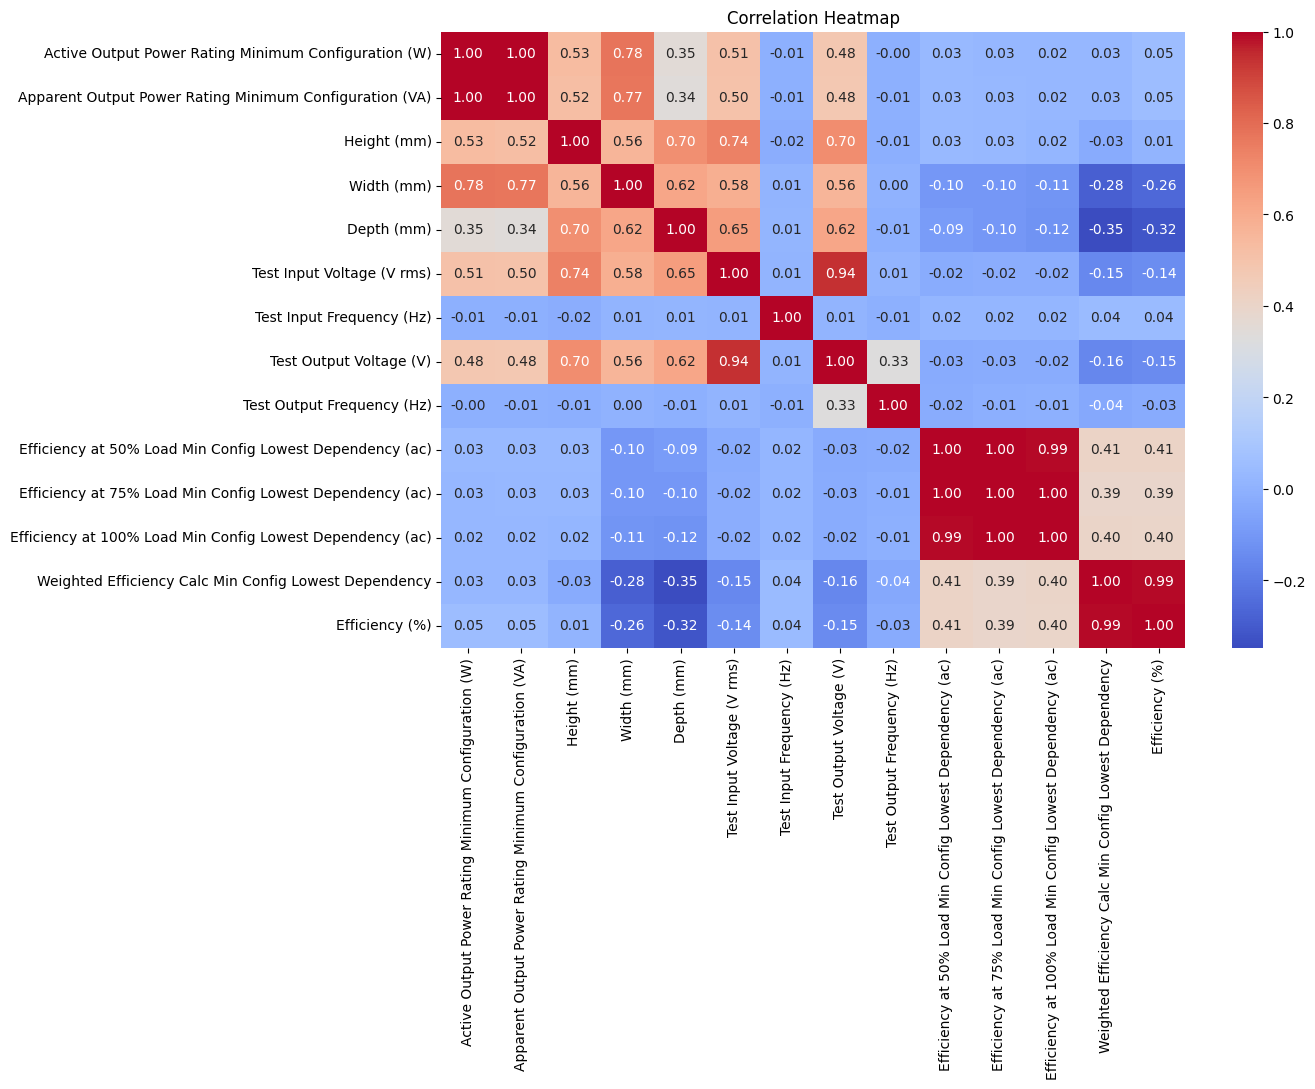

In [12]:
# 4. Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
correlation = df[valid_numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

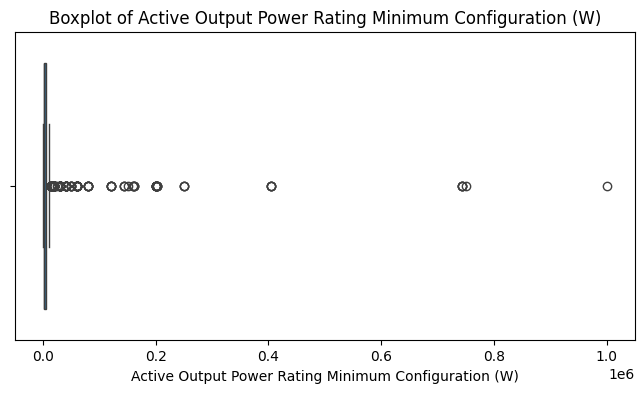

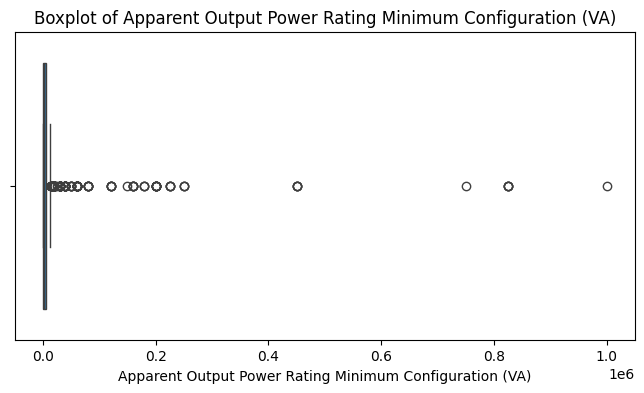

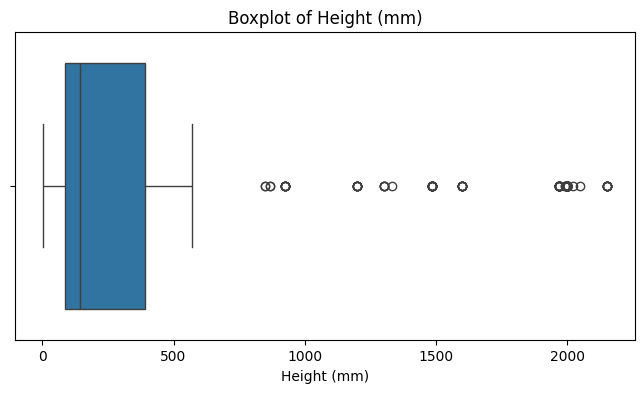

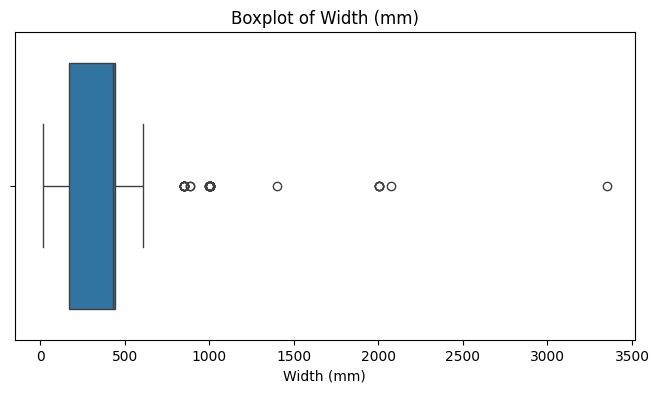

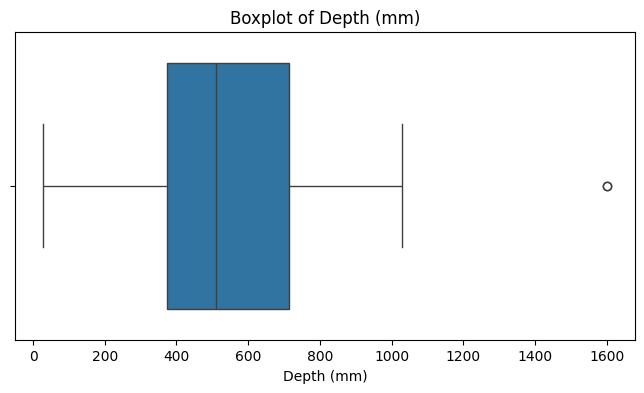

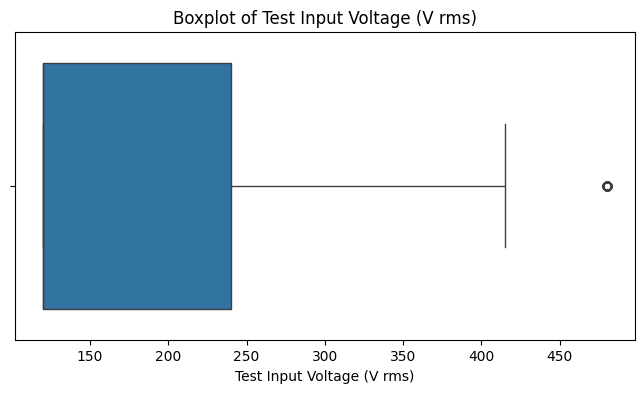

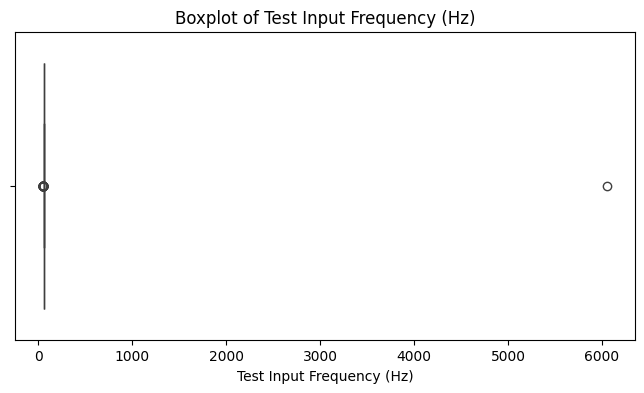

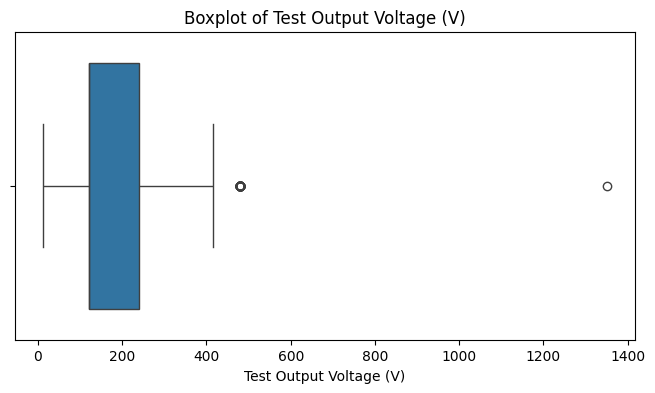

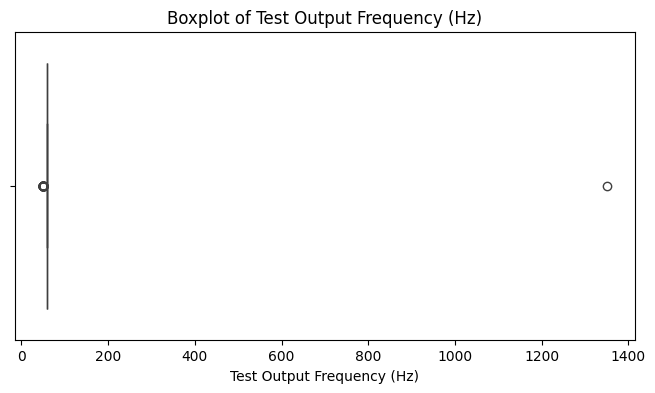

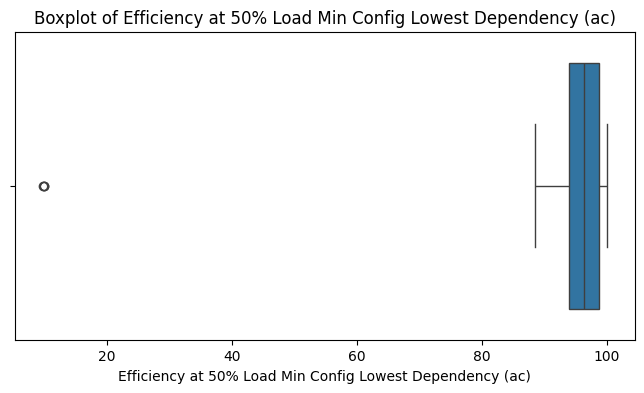

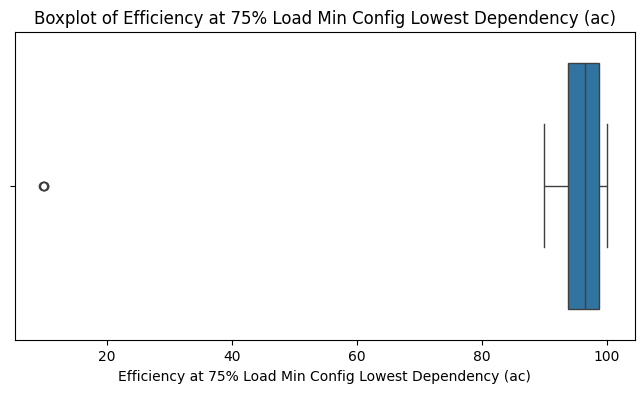

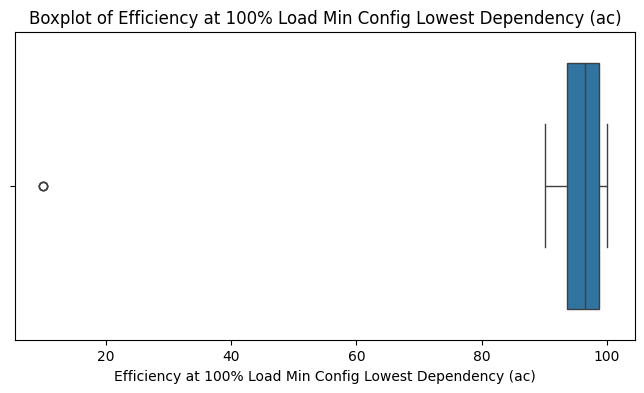

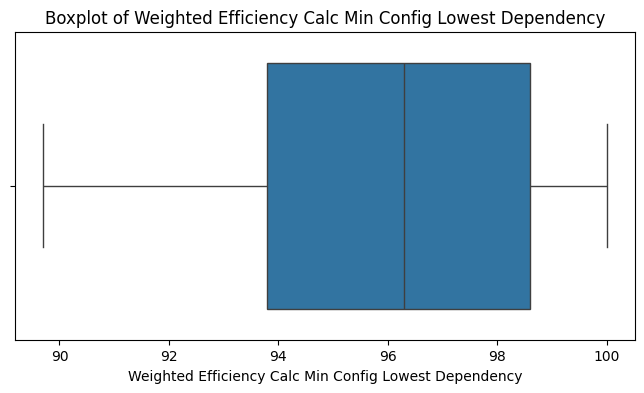

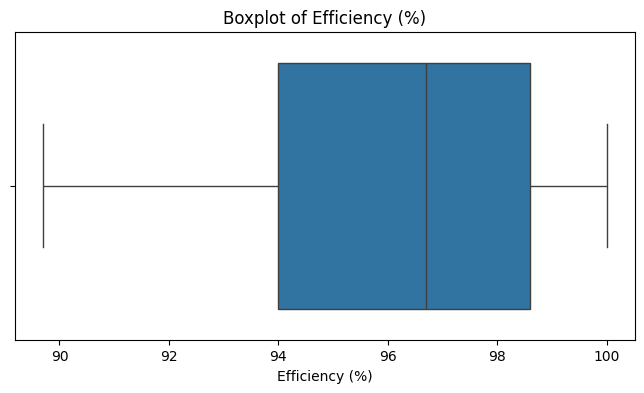

In [ ]:
# Plot boxplots for filtered valid numerical columns
for col in valid_numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

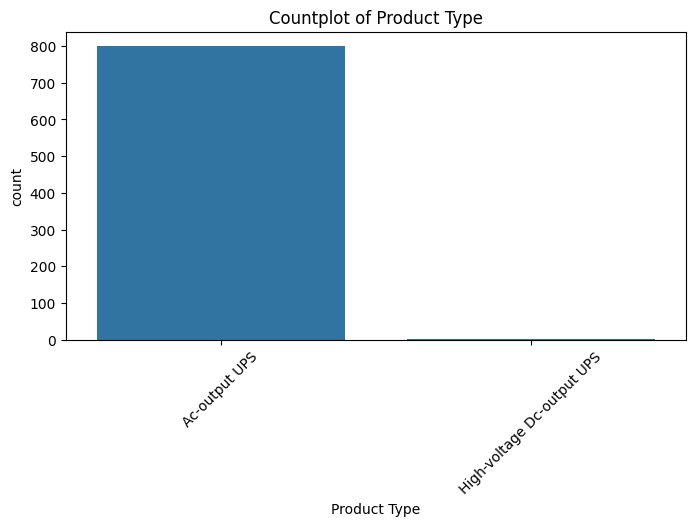

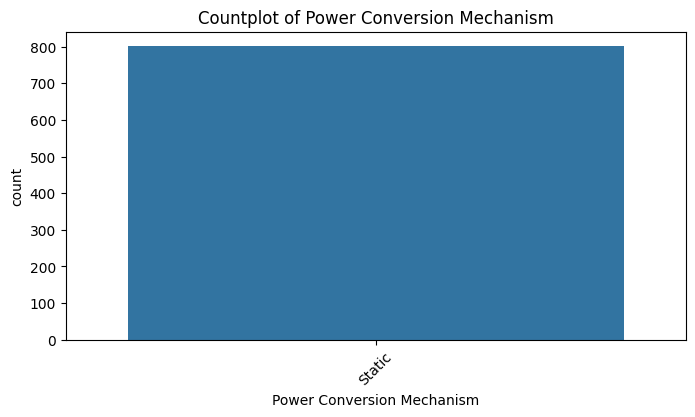

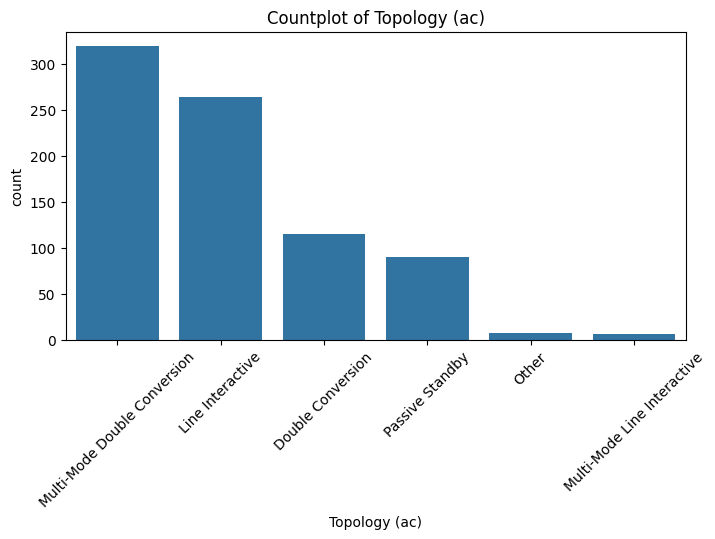

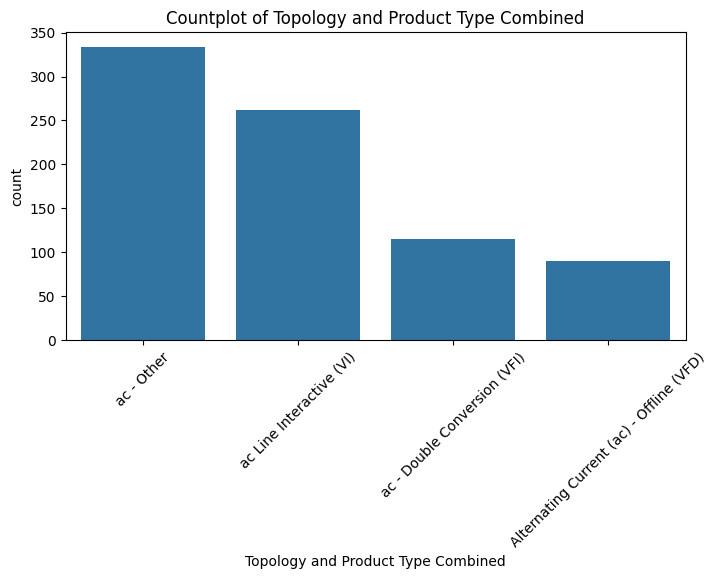

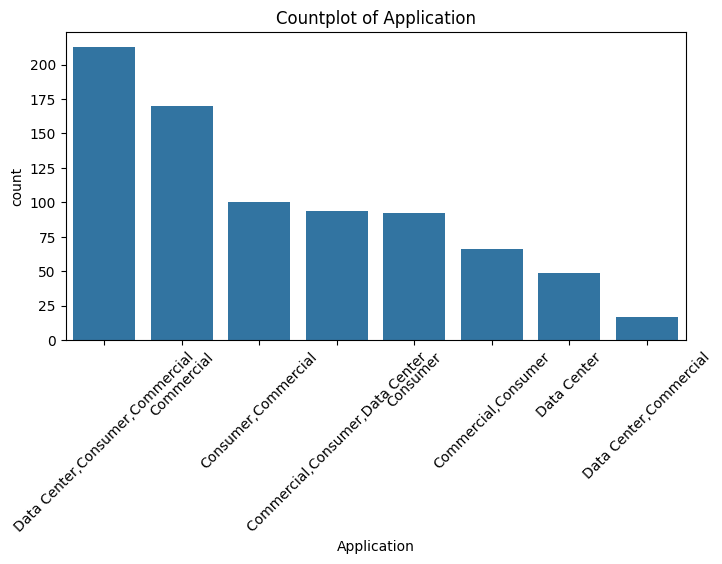

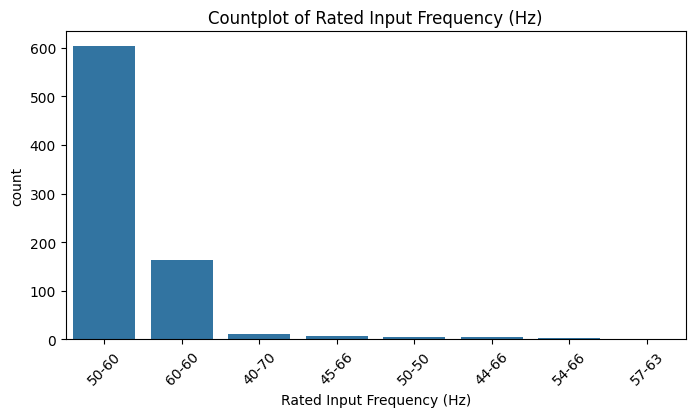

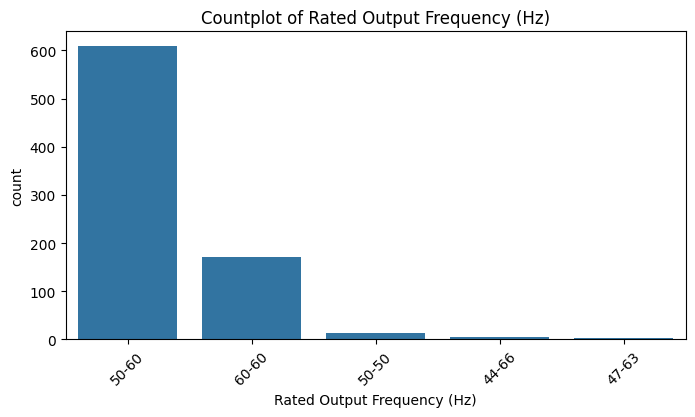

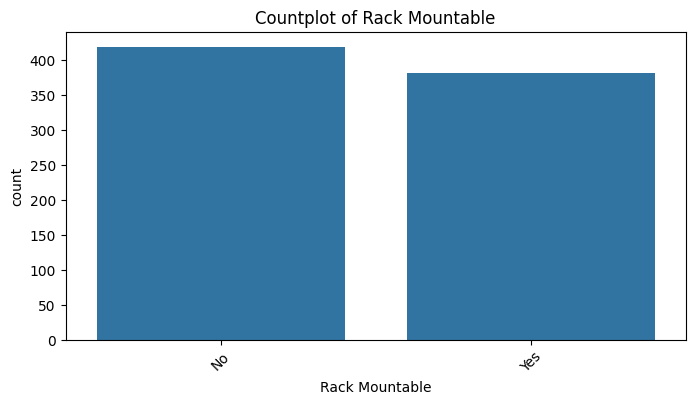

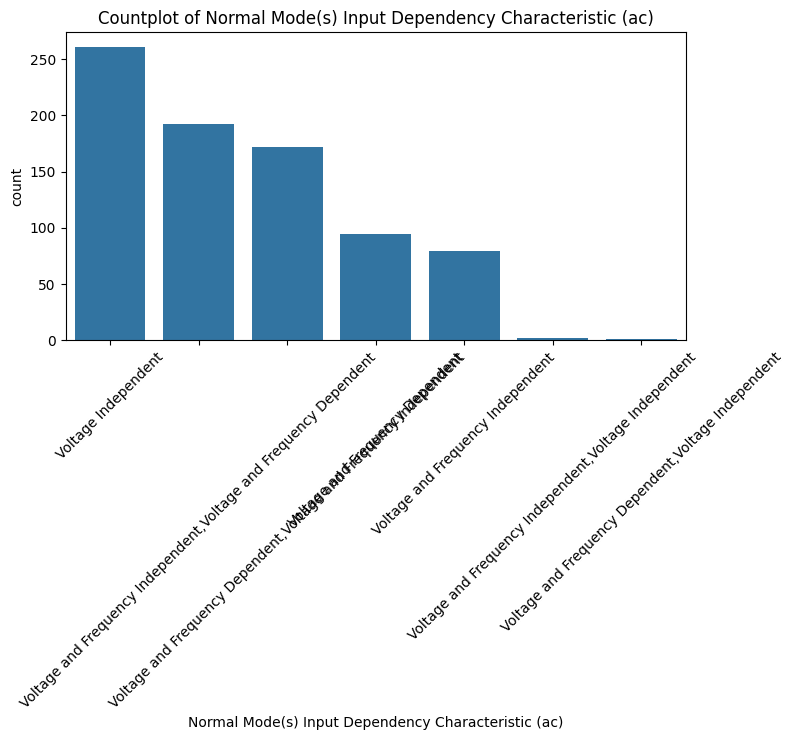

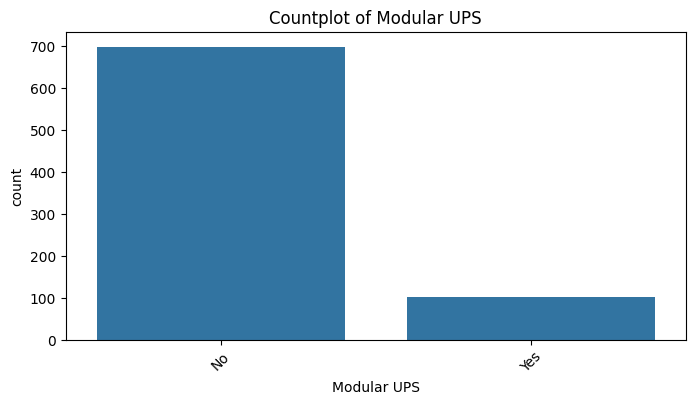

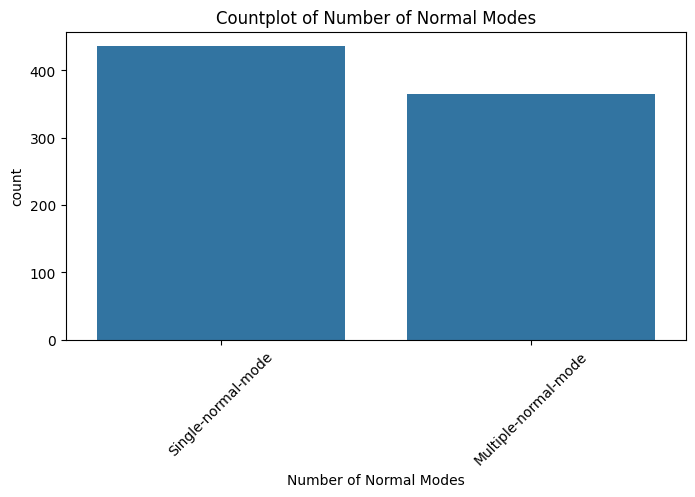

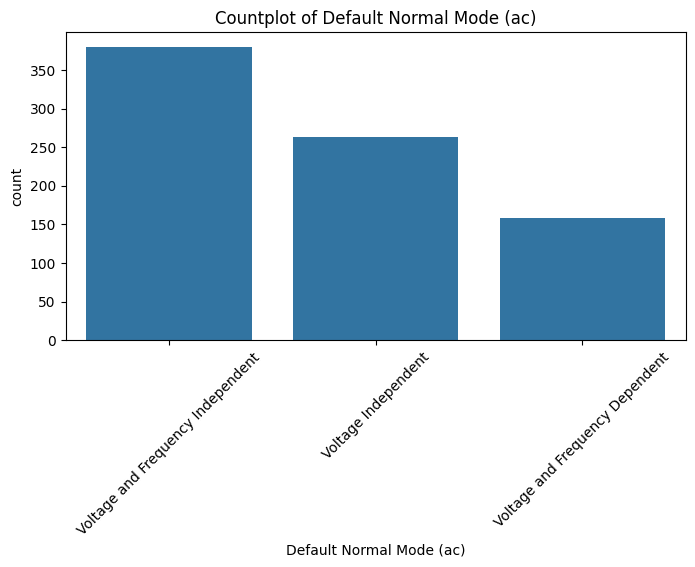

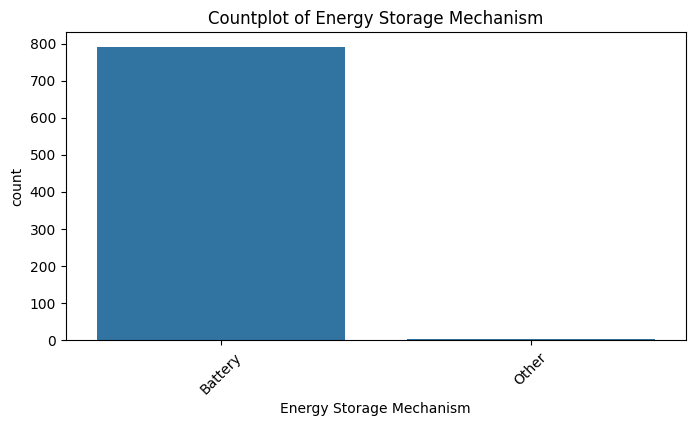

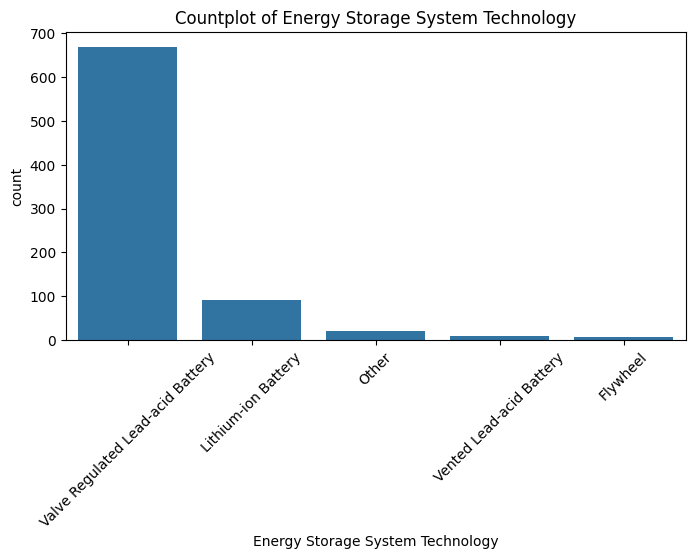

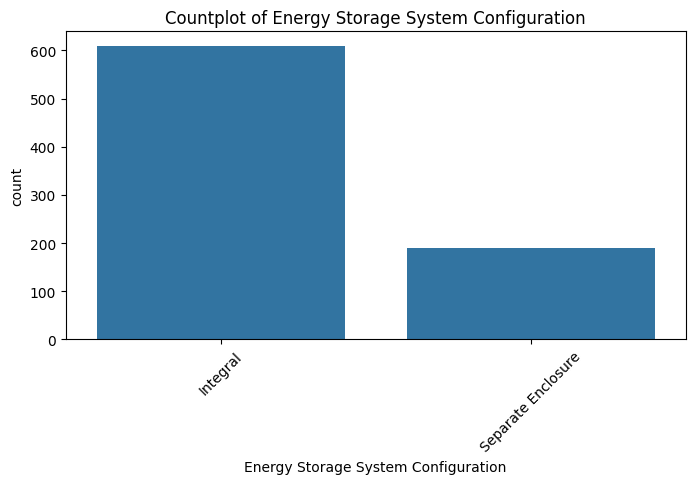

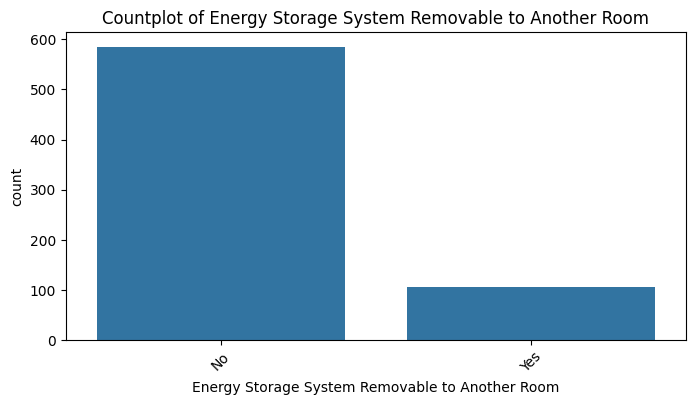

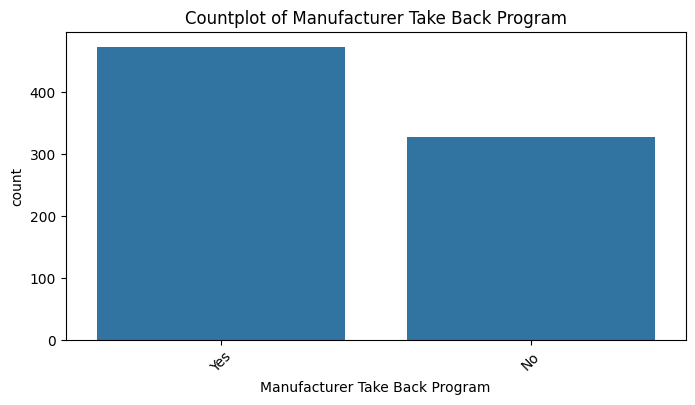

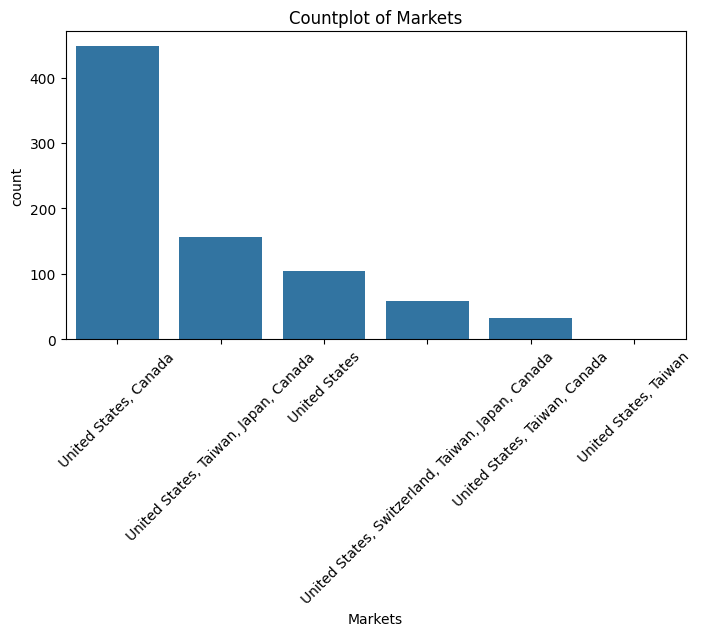

In [14]:
# 6. Countplot for categorical columns (if categories are few)
for col in categorical_cols:
    if df[col].nunique() <= 10:  # Only plot if categories are manageable
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Countplot of {col}")
        plt.xticks(rotation=45)
        plt.show()

In [16]:
def generate_insights(df):
    insights = {}

    # Analyze numerical columns with non-NaN values
    numerical_cols = df.select_dtypes(include=[np.number])
    valid_numerical_cols = [col for col in numerical_cols if df[col].notnull().sum() > 0]

    for col in valid_numerical_cols:
        mean_value = df[col].mean()
        min_value = df[col].min()
        max_value = df[col].max()
        std_dev = df[col].std()

        insights[col] = {
            "mean": mean_value,
            "min": min_value,
            "max": max_value,
            "std_dev": std_dev,
            "insight": f"{col} ranges from {min_value} to {max_value} with an average of {mean_value:.2f}."
        }

    # Analyze categorical columns
    categorical_cols = df.select_dtypes(include=['object'])
    for col in categorical_cols:
        unique_vals = df[col].dropna().unique()
        insights[col] = {
            "unique_values": unique_vals[:5],  # Show top 5 unique values
            "total_unique": len(unique_vals),
            "insight": f"{col} has {len(unique_vals)} unique values."
        }

    return insights

# Generate and display insights
insights = generate_insights(df)

# Print or save insights
for col, insight in insights.items():
    print(f"Column: {col}")
    for key, value in insight.items():
        print(f"  {key}: {value}")
    print("-" * 40)


Column: Active Output Power Rating Minimum Configuration (W)
  mean: 21242.721598002496
  min: 60
  max: 1000000
  std_dev: 80953.06430941107
  insight: Active Output Power Rating Minimum Configuration (W) ranges from 60 to 1000000 with an average of 21242.72.
----------------------------------------
Column: Apparent Output Power Rating Minimum Configuration (VA)
  mean: 22332.521847690386
  min: 240
  max: 1000000
  std_dev: 86207.46200015018
  insight: Apparent Output Power Rating Minimum Configuration (VA) ranges from 240 to 1000000 with an average of 22332.52.
----------------------------------------
Column: Active Output Power Rating Maximum Configuration (W)
  mean: 112705.45454545454
  min: 660.0
  max: 1000000.0
  std_dev: 155296.137140499
  insight: Active Output Power Rating Maximum Configuration (W) ranges from 660.0 to 1000000.0 with an average of 112705.45.
----------------------------------------
Column: Rack Mount Height (U)
  mean: 3.4787644787644787
  min: 1.0
  max: 2

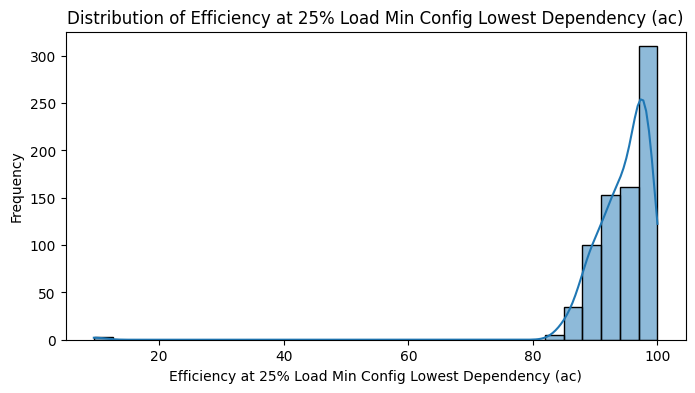

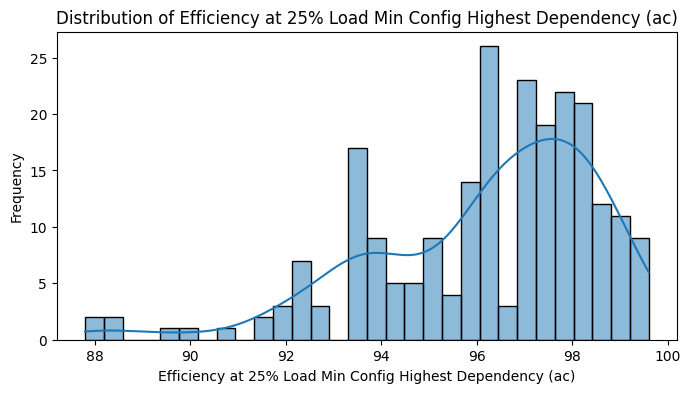

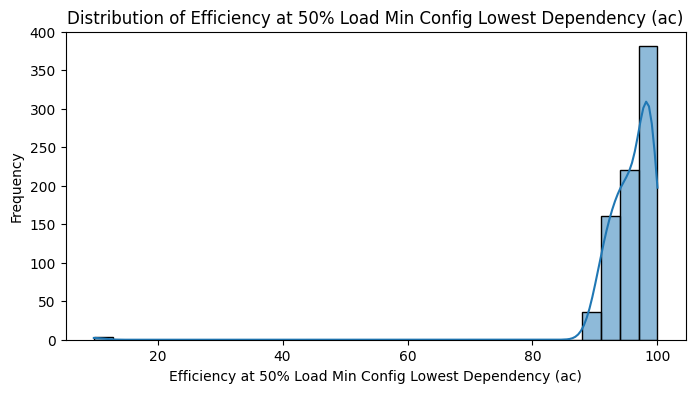

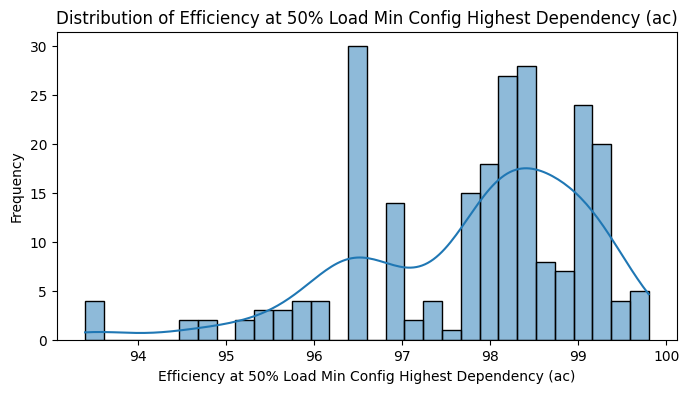

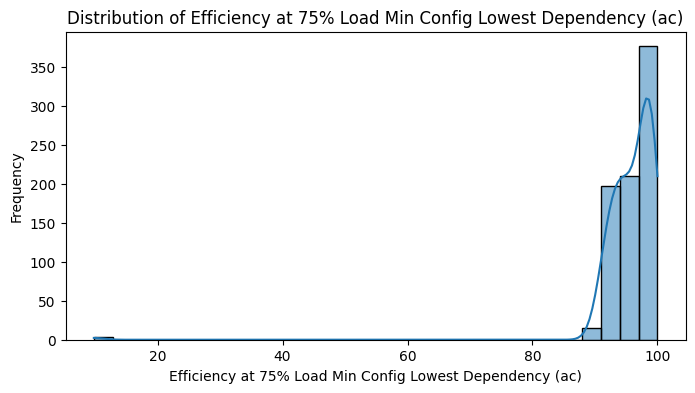

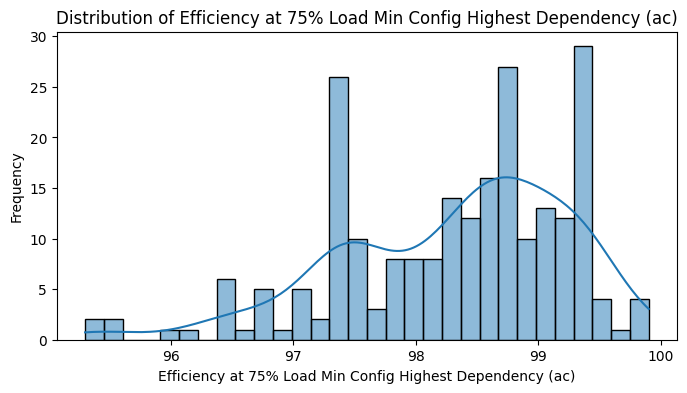

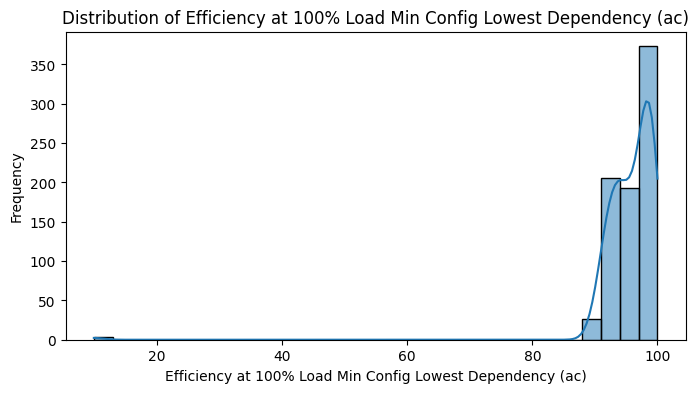

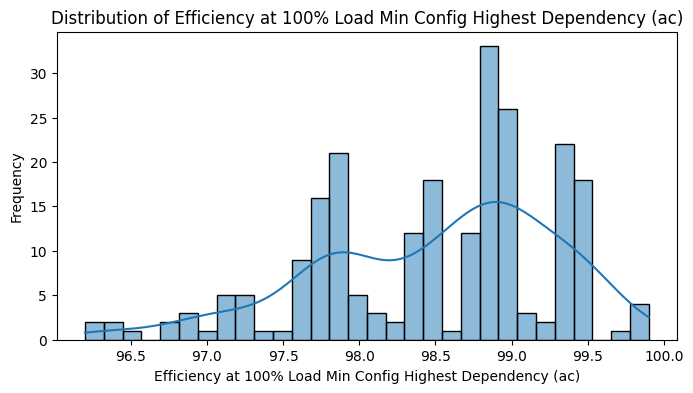

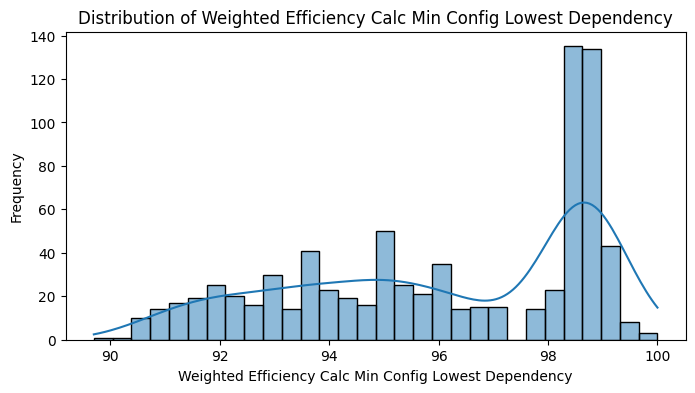

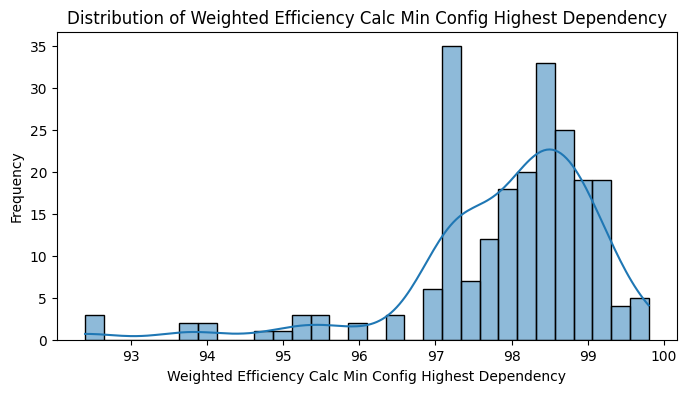

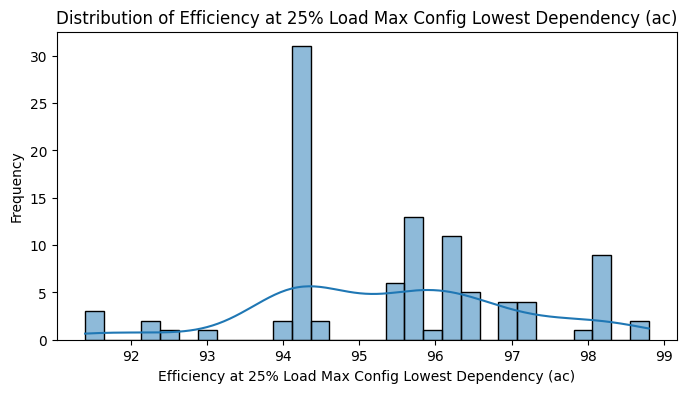

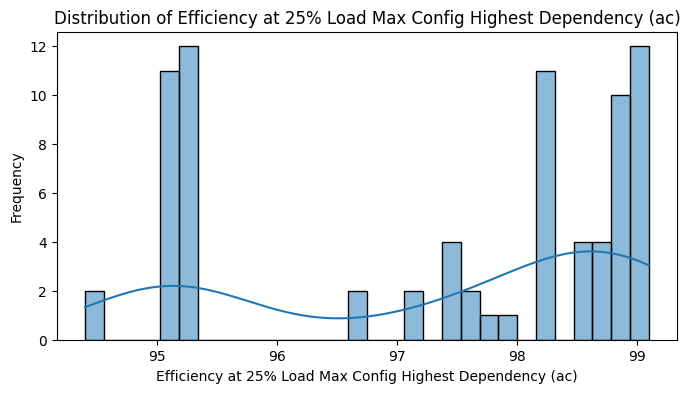

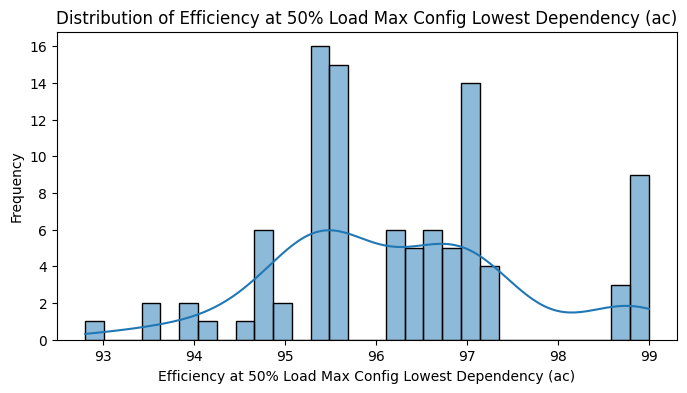

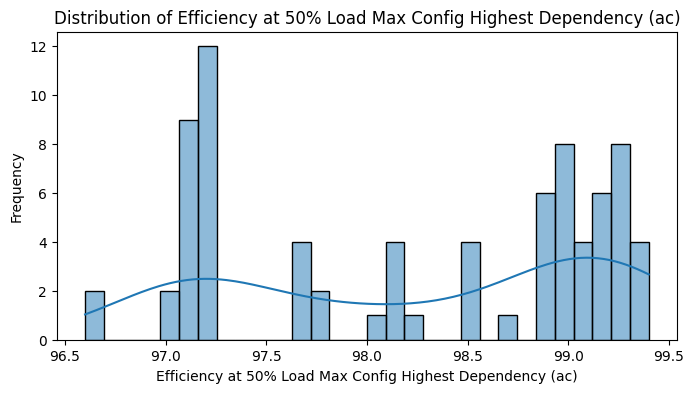

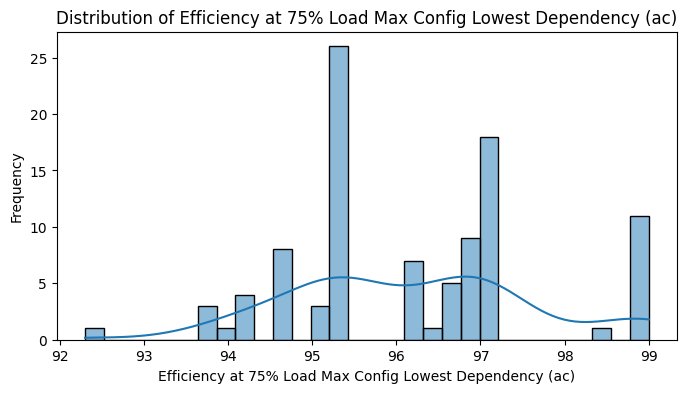

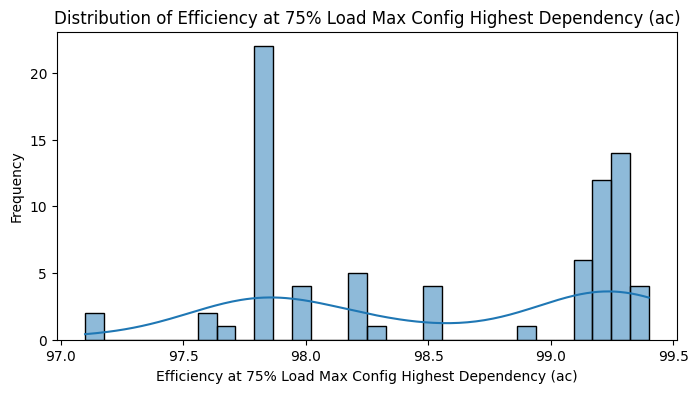

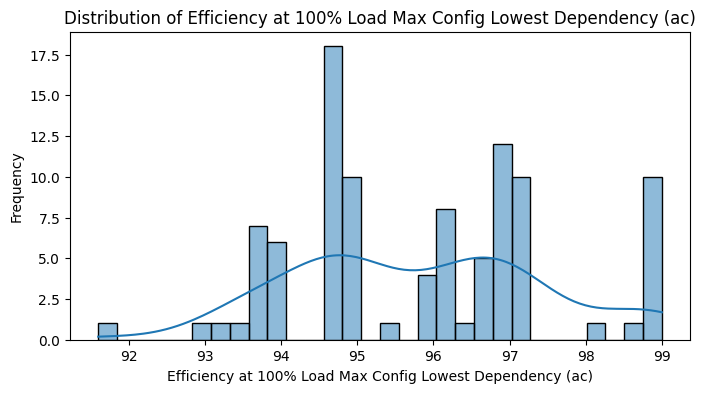

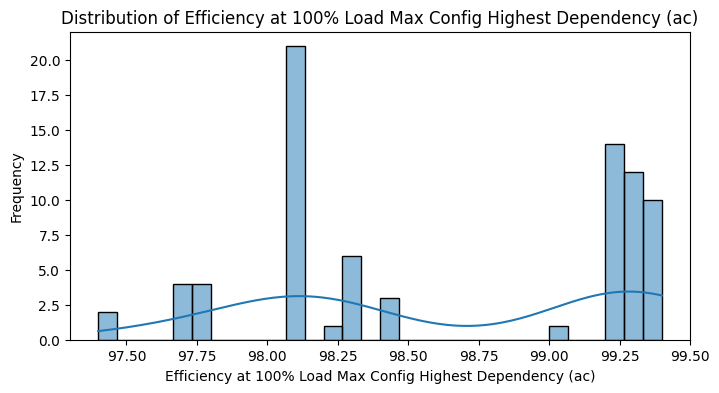

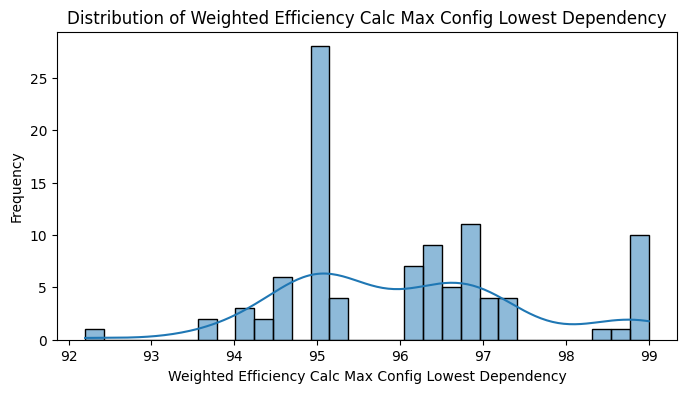

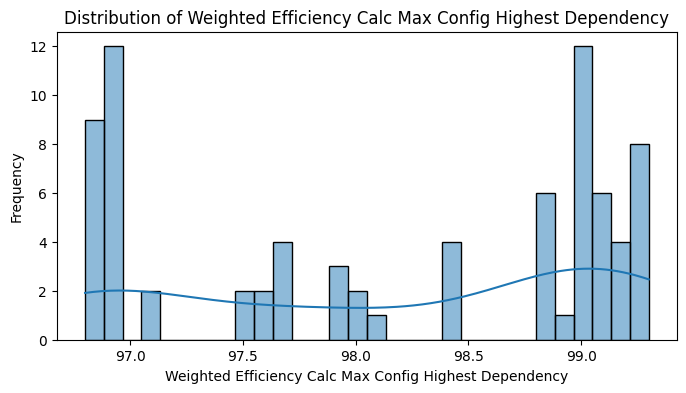

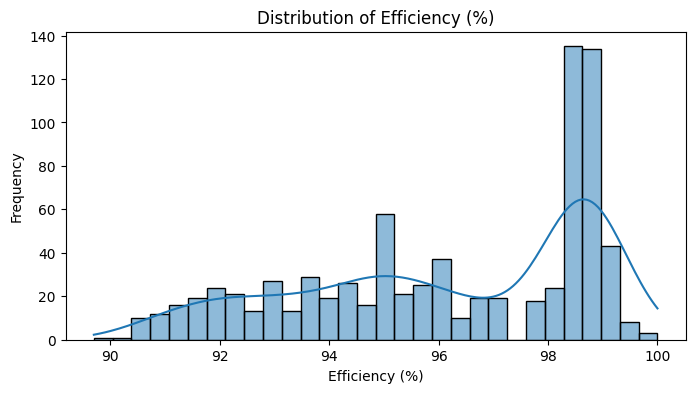

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of efficiency
efficiency_cols = [col for col in df.columns if "Efficiency" in col]
for col in efficiency_cols:
    if col in df and df[col].notnull().sum() > 0:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()